# Digital Image Processing With Python
**Rawser Spicer**

----------------------------------------------------------


**https://github.com/rwspicer/geos622talk**



## About Python
------------

<img src="https://www.python.org/static/img/python-logo@2x.png">




-	Python is a programming language that supports Object Oriented, Imperative, and Functional Programming.
-	Python is used for many scientific applications
  -	Scientific Libraries include numpy, scipy, and matplotlib
-	Can be used to automate many tasks in image processing and analysis
-	python 2 or python 3?



## simple examples(python 3.5)
----------

arithmetic operators 

In [2]:
print('5+2 = ', 5+2)
print('5-2 = ', 5-2)
print('5*2 = ', 5*2)
print('5/2 = ', 5/2)
print('5//2 = ', 5//2, 'integer division' )
print('5**2 = ', 5**2, 'exponentiation')

5+2 =  7
5-2 =  3
5*2 =  10
5/2 =  2.5
5//2 =  2 integer division
5**2 =  25 exponentiation


Variables

In [3]:
a = 1
b, c = 2, 3
a + b + c  

6

Logic

In [4]:
print(True)
print(False)
print(not False)
print(1 == 1)
print(1 == 0)
print(1 != 0)
print(1 > 0)
print(2>=1)
print(2>=2 )
print(1 < 0)
print(2<=1)
print(2<=2)
print(1 == 1 and 2 != 1)
print(1 == 1 or 1 != 1)


True
False
True
True
False
True
True
True
True
False
False
True
True
True


Functions and flow control 

Blocks are detrmined by indentation

In [5]:
def doubler (n):
    return 2 * n 

doubler(5)

10

In [6]:
def is_greater(A,B):
    print(A,B)
    if A > B:
        print( "A is greater than B")
        return True
    elif A < B:
        print( "A is less than B" )
        return False
    else:
        print( "A is equal to B" )
        return False
is_greater (1,2)
is_greater (12,2)
is_greater (2,2)

1 2
A is less than B
12 2
A is greater than B
2 2
A is equal to B


False

## Lists, Loops, and Dictionaries

In [6]:
## while loop
limit = 5
i = 0

while i < limit:
    print(i**2)
    i+=1
    
print('')   
## for loops
for i in range(5):
    print(i**2)
    
print('')  
### a list   
l = ['cat', 'dog', 'bird', 'fish']
print(l[1]) # index is zero beased, so this is the second element

print('')  
for i in l:
     print(i)

print('')  
### a dictionary
d = {'fisrt': 'a', 'second': 2, 'third':l}
for i in d:
     print('key', i)
     print('value', d[i])
    


0
1
4
9
16

0
1
4
9
16

dog

cat
dog
bird
fish

key fisrt
value a
key third
value ['cat', 'dog', 'bird', 'fish']
key second
value 2


## Useful libraries for image processing


- There are many useful libraries for python
  - numpy: Multidimensional arrays can represent images, and matrices
  - scipy: Scientific tools for python
    - scikit image: image toolkit based on scipy
  - pandas: data analysis
  - matplotlib and bokeh: plotting, image display
  - gdal: for reading and writing geospatial data

  

<img src='http://matplotlib.org/_static/logo2.svg'>

Importing libriareis 

In [7]:
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt

## Numpy arrays as they relate to images

- A Numpy array is a N dimensional array object that can be used to represent image data in python

- gdal will load raster bands as this type


[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


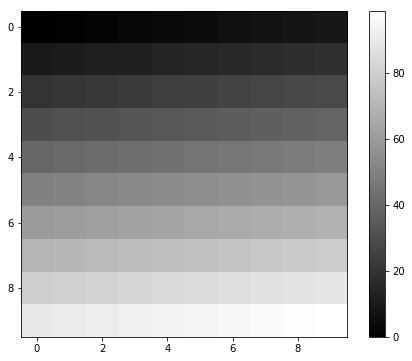

In [14]:
def load_raster_band (img_file, band = 1):
    """band is one based"""
    dataset = gdal.Open(img_file, gdal.GA_ReadOnly)
    return dataset.GetRasterBand(band).ReadAsArray()

def show_img(img,cmap='gray'):
    fig=plt.figure(figsize=(8, 6))
    plt.imshow(img, cmap=cmap)
    plt.colorbar()
    plt.show()

# exaple array
example_arr = np.arange(100).reshape((10,10))

print(example_arr)
show_img(example_arr)

**Indexing in numpy array**

In python, and numpy, indexing is zero based

In [9]:
print('first row',example_arr[0])
print('first col',example_arr[:,0])
print('top left corner')
print(example_arr[0:5,0:5])

first row [0 1 2 3 4 5 6 7 8 9]
first col [ 0 10 20 30 40 50 60 70 80 90]
top left corner
[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


Manipulating image values using an index.

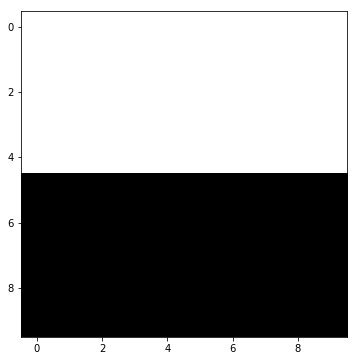

In [10]:
gr50 = example_arr<50
lte50 = example_arr>=50
example_arr[ gr50 ] = 255
example_arr[lte50] = 0
show_img(example_arr)

## examples base on lecutres so far

# Contrast Streching

skimage.exposure.rescale_intensity(image, in_range, out_range)

Return image after stretching or shrinking its intensity levels.

The desired intensity range of the input and output, in_range and out_range respectively, are used to stretch or shrink the intensity range of the input image. See examples below.

original image


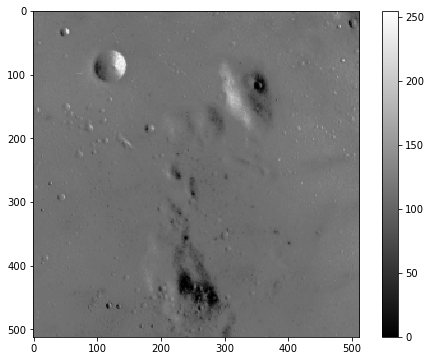

rescaled image (stretching)


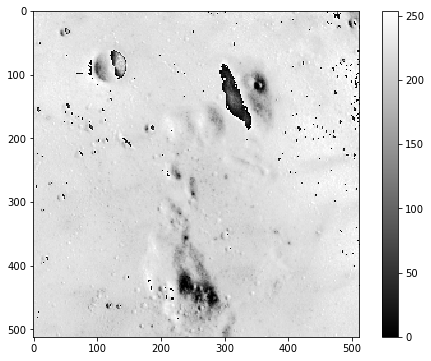

rescaled image (using equation g_out = g_in * a + b )


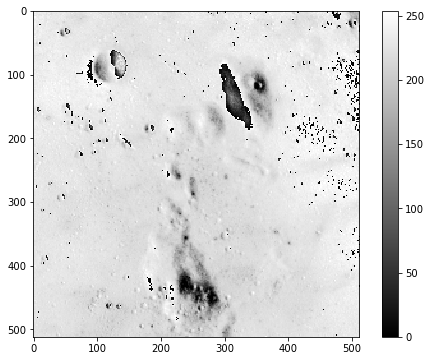

In [29]:
# Contrast Streching

from skimage import data, exposure
from copy import deepcopy
img = data.moon() ## scikit image example image
print('original image')
show_img(img)
img_rescale = exposure.rescale_intensity(img, out_range=(0,500))

print('rescaled image (stretching)')
show_img(img_rescale)

## or manual
print('rescaled image (using equation g_out = g_in * a + b )')
img_rescale = deepcopy(img) * 2 
show_img(img_rescale)

## Gamma correction

skimage.exposure.adjust_gamma(image, gamma=1, gain=1)

Performs Gamma Correction on the input image.

Also known as Power Law Transform. This function transforms the input image pixelwise according to the equation O = I**gamma after scaling each pixel to the range 0 to 1.

original image


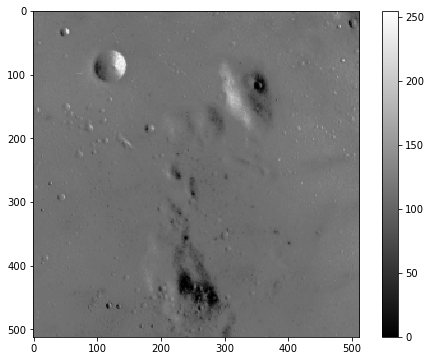

from equation gl_out = a* gl_in ** gamma )
high gamma


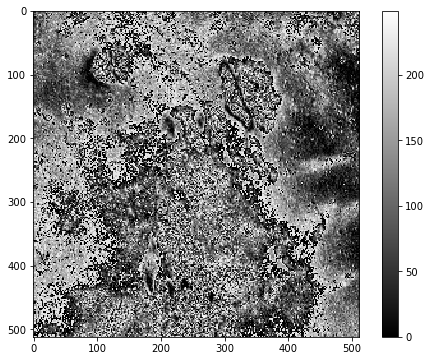

low gamma
looks bad because of scaling


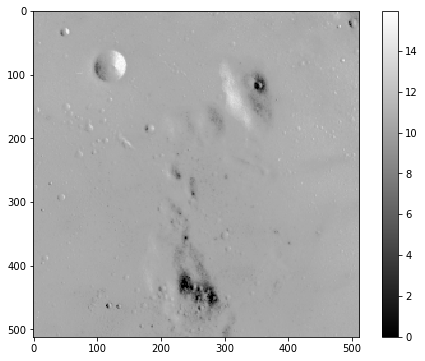

using scikit image
high gamma


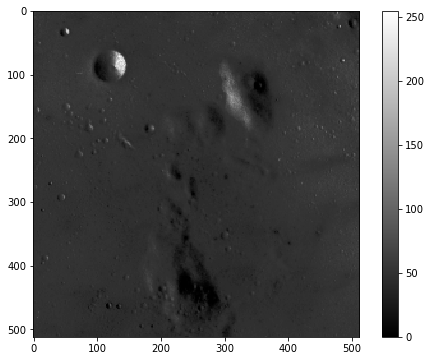

low gamma


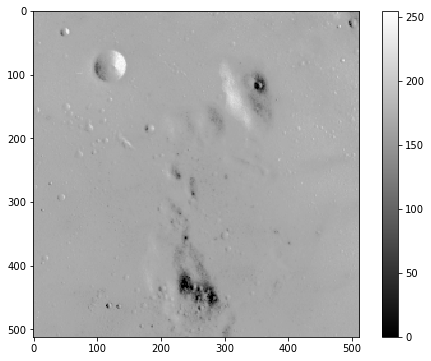

In [37]:
img = data.moon() ## scikit image example image
print('original image')
show_img(img)

#manual
print('from equation gl_out = a* gl_in ** gamma )')
print('high gamma')
print('looks bad because image needs to be rescaled, scikit-image function does this')
img_rescale = deepcopy(img) ** 2 
#img_rescale[img_rescale>255] = 255
show_img(img_rescale)
print('low gamma')

img_rescale = deepcopy(img) ** .5 
show_img(img_rescale)

#scikit image
print('using scikit image')
print('high gamma')
img_rescale = exposure.adjust_gamma(img, gamma=2)
show_img(img_rescale)
print('low gamma')
img_rescale = exposure.adjust_gamma(img, gamma=.5)
show_img(img_rescale)


## Histogram Stretching

skimage.exposure.equalize_hist(image) 

Return image after histogram equalization.

original image


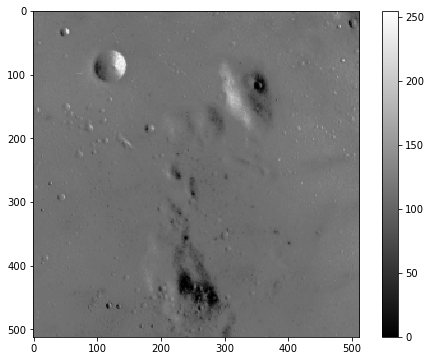

Histogram


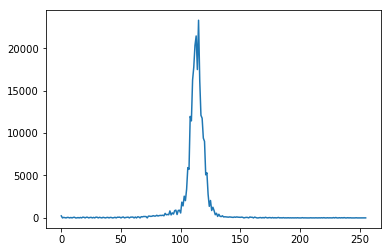

Equalized image


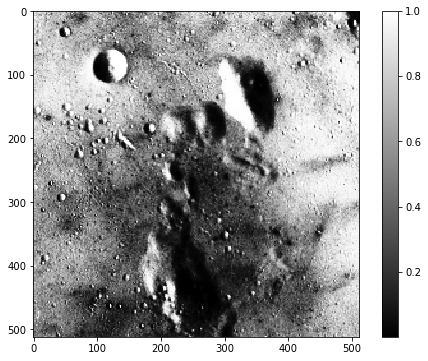

Histogram


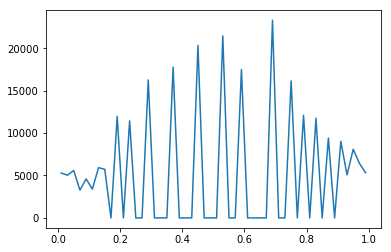

In [71]:
img = data.moon() ## scikit image example image
print('original image')
show_img(img)


print('Histogram')
hist, bc = exposure.histogram(img)
plt.plot(bc,hist)
plt.show()

eq_img = exposure.equalize_hist(img)
print('Equalized image')
show_img(eq_img)


print('Histogram')
hist, bc = exposure.histogram(eq_img, nbins=50)
#plt.hist(*exposure.histogram(eq_img, nbins=50))
#print(exposure.histogram(eq_img, nbins=50))
plt.plot(bc,hist)
plt.show()

## Sigmoid

skimage.exposure.adjust_sigmoid(image, cutoff=0.5, gain=10, inv=False)

Performs Sigmoid Correction on the input image.

Also known as Contrast Adjustment. This function transforms the input image pixelwise according to the equation O = 1/(1 + exp*(gain*(cutoff - I))) after scaling each pixel to the range 0 to 1.

original image


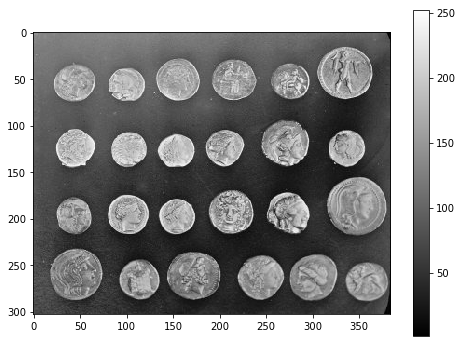

sigmoid image


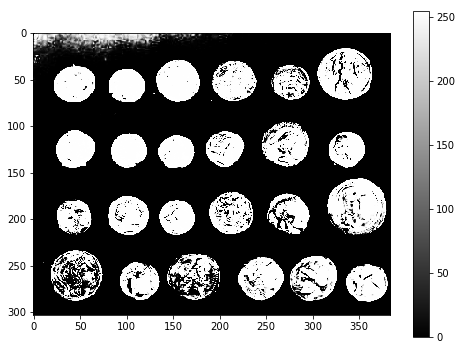

In [70]:
img = data.coins()
print('original image')
show_img(img)
sig_img = exposure.adjust_sigmoid(img,.5,127)
print('sigmoid image')
show_img(sig_img)